In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab6.ipynb")

# Lab 6: Fitting Models to Data

In this lab, you will practice using a numerical optimization package `cvxpy` to compute solutions to optimization problems. The example we will use is a linear fit and a quadratic fit.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Objectives for Lab 6:

Models and fitting models to data is a common task in data science. In this lab, you will practice fitting models to data. The models you will fit are:

* Linear fit
* Normal distribution

## Boston Housing Dataset

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
from urllib.request import urlopen
html = urlopen(data_url).read()
text = html.decode("utf-8")  # Decode the HTML content into text

lines = text.splitlines()[7:21]

features = []
for line in lines:
    line_strings = line.split()
    if line_strings:
        first_string = line_strings[0]
        features.append(first_string)

housing = pd.DataFrame(data, columns = features)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


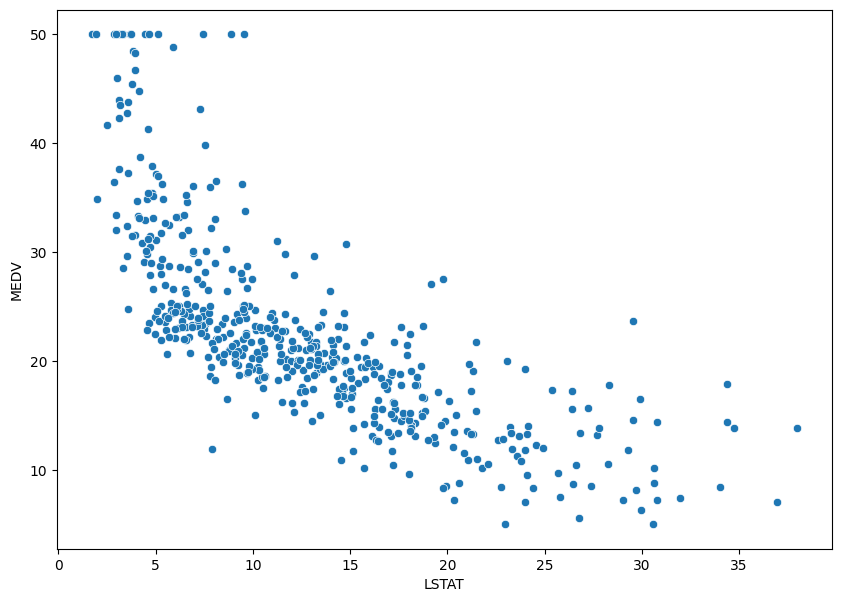

In [4]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x='LSTAT', y='MEDV', data=housing)
plt.show()

cp.Variable(len(X.values))The model for the relationship between the response variable MEDV ($y$) and predictor variable LSTAT ($u$) is
$$ y_i = \beta_0 + \beta_1 u_i + \epsilon_i, $$
where $\epsilon_i$ is random noise.

In order to fit the linear model to data, we minimize the sum of squared errors of all observations, $i=1,2,\dots,n$. 
$$\begin{aligned}
&\min_{\beta} \sum_{i=1}^n (y_i - \beta_0 + \beta_1 u_i )^2 = \min_{\beta} \sum_{i=1}^n (y_i - x_i^T \beta)^2 = \min_{\beta} \|y - X \beta\|_2^2
\end{aligned}$$
where $\beta = (\beta_0,\beta_1)^T$, and $x_i^T = (1, u_i)$. Therefore, $y = (y_1, y_2, \dots, y_n)^T$ and $i$-th row of $X$ is $x_i^T$. 

## Question 1: Constructing Data Variables

Define $y$ and $X$ from `housing` data.

<!--
BEGIN QUESTION
name: q1
manual: false
points: 3
-->

In [5]:
y = housing['MEDV']
X = housing[['LSTAT']]
X.insert(0, 'intercept', 1)
# X.insert(..., 'intercept', ...)

In [6]:
grader.check("q1")

q1 results: All test cases passed!

## Installing CVXPY

First, install `cvxpy` package by running the following bash command:

In [7]:
!pip install cvxpy

## Question 2: Fitting Linear Model to Data

Read this example of how cvxpy problem is setup and solved: https://www.cvxpy.org/examples/basic/least_squares.html

The usage of cvxpy parallels our conceptual understanding of components in an optimization problem:
* `beta2` are the variables $\beta$
* `loss2` is sum of squared errors
* `prob2` minimizes the loss by choosing $\beta$
* `yhat2` provides estimation of $\hat y = x^T\hat{\beta}$

Make sure to extract the data array of data frames (or series) by using `values`: e.g., `X.values` 

<!--
BEGIN QUESTION
name: q2
manual: false
points: 3
-->

In [8]:
import cvxpy as cp

beta2 = cp.Variable(2)
loss2 = cp.sum_squares(y.values - X.values @ beta2)
prob2 = cp.Problem(cp.Minimize(loss2))

prob2.solve()

yhat2 = X.values @ beta2.value

In [9]:
grader.check("q2")

q2 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Question 3: Visualizing resulting Linear Fit

Visualize fitted model by plotting `LSTAT` by `MEDV`.

<!--
BEGIN QUESTION
name: q3
manual: true
points: 3
-->

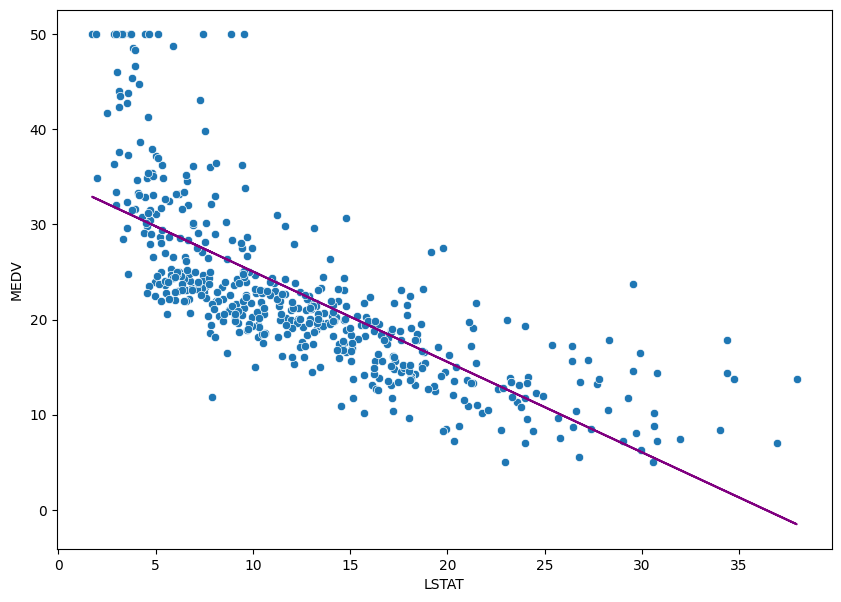

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = housing, ax=ax)
plt.plot(X['LSTAT'], yhat2, color="purple")

plt.show()

<!-- END QUESTION -->

## Question 4: Fitting Quadratic Model to Data

Add a column of squared `LSTAT` values to `X`. The new model is,

Then, fit a quadratic model to data.

<!--
BEGIN QUESTION
name: q4a
manual: false
points: 3
-->

In [11]:
X2 = X.copy()
X2.insert(2, 'LSTAT^2', X2['LSTAT']**2)

beta4 = cp.Variable(3)
loss4 = cp.sum_squares(y.values - X2.values @ beta4)
prob4 = cp.Problem(cp.Minimize(loss4))

prob4.solve()

yhat4 = X2.values @ beta4.value

In [12]:
grader.check("q4a")

q4a results: All test cases passed!

<!-- BEGIN QUESTION -->

Visualize quadratic fit:

<!--
BEGIN QUESTION
name: q4b
manual: true
points: 3
-->

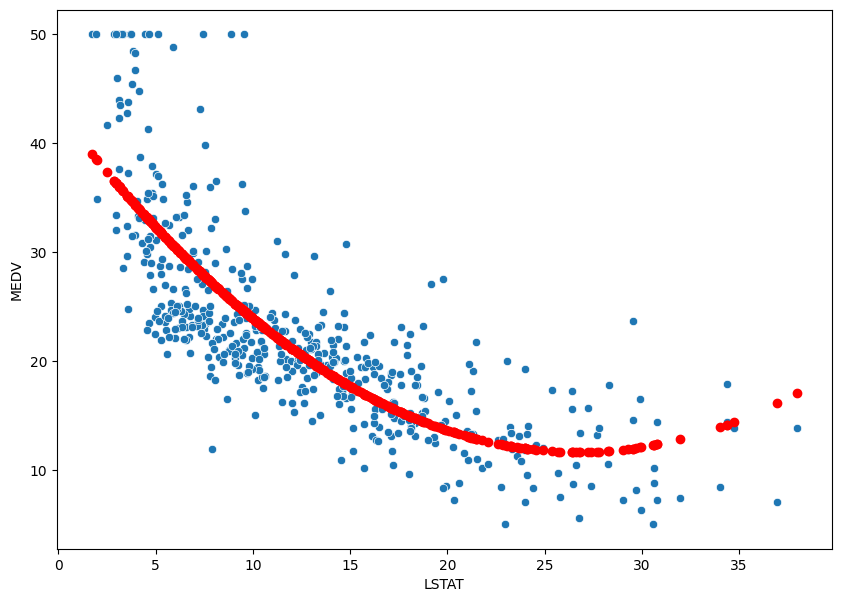

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = housing, ax=ax)
plt.scatter(X2['LSTAT'], yhat4, color="red")

plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [14]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q4a results: All test cases passed!

## Submission

1. Save file to confirm all changes are on disk
2. Run *Kernel > Restart & Run All* to execute all code from top to bottom
3. Save file again to write any new output to disk
4. Select *File > Save and export Notebook as > HTML*.
5. Open in Google Chrome and print to PDF.
6. Submit to Gradescope